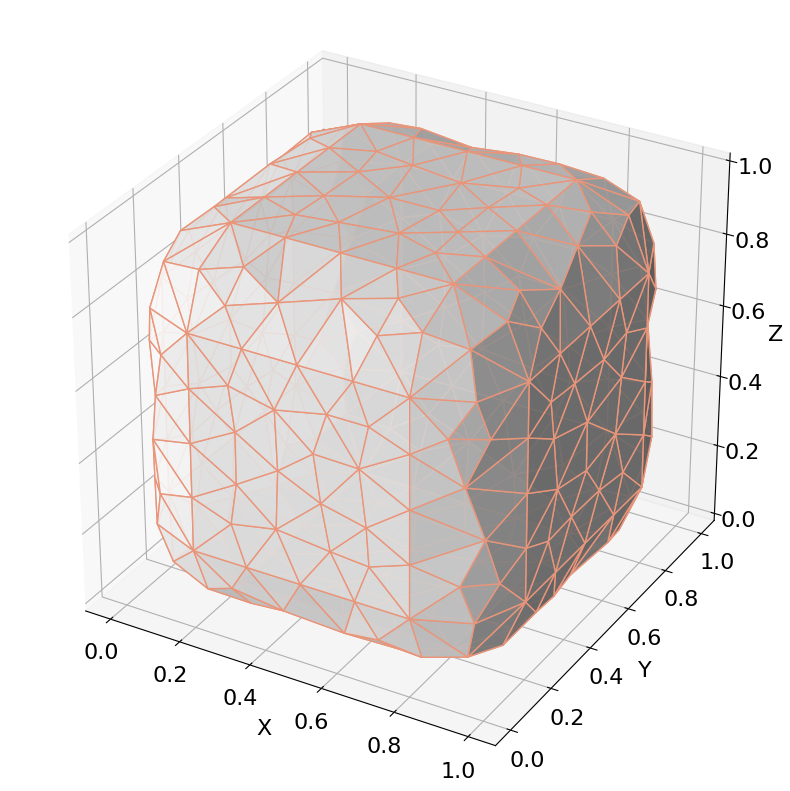

In [7]:
import meshio
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams.update({'font.size': 16}) 
# 读取.msh文件
mesh = meshio.read("fillet.msh")

# 获取点和三角形
points = mesh.points
triangles = mesh.cells_dict["triangle"]

# 使用matplotlib进行可视化
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

# 绘制三角形
ax.plot_trisurf(points[:, 0], points[:, 1], points[:, 2], triangles=triangles, color='#FFFFFF', edgecolor='#E9957A', alpha=0.9)

# 设置坐标轴的标签
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_aspect('equal')
# 显示图形
plt.show()



In [9]:

# import matplotlib.pyplot as plt
from firedrake import *
import matplotlib.pyplot as plt
import plotly.graph_objects as go
# 读取 "cylinder.msh" 文件
mesh = Mesh("sphere.msh")
plt.rcParams.update({'font.size': 25}) 
V = FunctionSpace(mesh, "Lagrange", 2)

# 定义 u 和 v 的函数
u, v = TrialFunction(V), TestFunction(V)
phi, psi = TestFunction(V), TestFunction(V)

# GS 方程的参数
D_u, D_v, a, b = Constant(1/20), Constant(1), Constant(0.1), Constant(0.9)

# 初始条件
x, y= SpatialCoordinate(mesh)
#u0_expr = exp(-25*((x - 5)**2 + (y - 5)**2))
#v0_expr = 2*exp(-25*((x - 10)**2 + (y - 10)**2))
u0_expr = sin(x*x+y*y)
v0_expr = cos(x*x+y*y)
u0, v0 = interpolate(u0_expr, V), interpolate(v0_expr, V)

u, v = Function(V, name="U-Concentration"), Function(V, name="V-Concentration")
dt = 0.01
# GS 方程的弱形式
F_u = (u - u0)*phi*dx - dt*(-D_u*dot(grad(u), grad(phi))*dx + u*u*v*phi*dx - u*phi*dx +a*phi*dx)
F_v = (v - v0)*psi*dx - dt*(-D_v*dot(grad(v), grad(psi))*dx - u*u*v*psi*dx + b*psi*dx)

t_end = 5.0
num_steps = int(t_end / dt)
output_times = [0,0.01,t_end/5,2*t_end/5,3*t_end/5,4*t_end/5]


for step in range(num_steps):
    current_time = step * dt
    solve(F_u == 0, u)
    solve(F_v == 0, v)
    u0.assign(u)
    v0.assign(v)

    if current_time in output_times:
        u_values = u.dat.data_ro
        fig = go.Figure(data=[
            go.Mesh3d(
                x=points[:, 0],
                y=points[:, 1],
                z=points[:, 2],
                i=triangles[:, 0],
                j=triangles[:, 1],
                k=triangles[:, 2],
                intensity=u_values,  # 这里设置标量值以用于上色
                colorscale='Icefire'  # 选择一个色阶
            )
        ])
        fig.update_layout(scene_camera=dict(
            up=dict(x=0, y=0, z=1),
            center=dict(x=0, y=0, z=0),
            eye=dict(x=-1, y=1, z=1)
        ))
        fig.show()
        plt.show()


In [22]:

# import matplotlib.pyplot as plt
from firedrake import *
import matplotlib.pyplot as plt
import plotly.graph_objects as go
# 读取 "cylinder.msh" 文件
mesh = Mesh("sphere.msh")
plt.rcParams.update({'font.size': 25}) 
V = FunctionSpace(mesh, "Lagrange", 2)

# 定义 u 和 v 的函数
u, v = TrialFunction(V), TestFunction(V)
phi, psi = TestFunction(V), TestFunction(V)

# GS 方程的参数
D_u, D_v, a, b = Constant(1/20), Constant(1), Constant(0.1), Constant(0.9)

# 初始条件
x, y= SpatialCoordinate(mesh)
#u0_expr = exp(-25*((x - 5)**2 + (y - 5)**2))
#v0_expr = 2*exp(-25*((x - 10)**2 + (y - 10)**2))
u0_expr = sin(x*x+y*y)
v0_expr = cos(x*x+y*y)
u0, v0 = interpolate(u0_expr, V), interpolate(v0_expr, V)

u, v = Function(V, name="U-Concentration"), Function(V, name="V-Concentration")
dt = 0.01
# GS 方程的弱形式
F_u = (u - u0)*phi*dx - dt*(-D_u*dot(grad(u), grad(phi))*dx + u*u*v*phi*dx - u*phi*dx +a*phi*dx)
F_v = (v - v0)*psi*dx - dt*(-D_v*dot(grad(v), grad(psi))*dx - u*u*v*psi*dx + b*psi*dx)

t_end = 5.0
num_steps = int(t_end / dt)
output_times = [0,0.01,t_end/5,2*t_end/5,3*t_end/5,4*t_end/5]


for step in range(num_steps):
    current_time = step * dt
    solve(F_u == 0, u)
    solve(F_v == 0, v)
    u0.assign(u)
    v0.assign(v)

    if current_time in output_times:
        u_values = v.dat.data_ro
        fig = go.Figure(data=[
            go.Mesh3d(
                x=points[:, 0],
                y=points[:, 1],
                z=points[:, 2],
                i=triangles[:, 0],
                j=triangles[:, 1],
                k=triangles[:, 2],
                intensity=u_values,  # 这里设置标量值以用于上色
                colorscale='Icefire'  # 选择一个色阶
            )
        ])
        fig.update_layout(scene_camera=dict(
            up=dict(x=0, y=0, z=1),
            center=dict(x=0, y=0, z=0),
            eye=dict(x=-1, y=1, z=1)
        ))
        fig.show()
        plt.show()


In [37]:
# import matplotlib.pyplot as plt
from firedrake import *
import matplotlib.pyplot as plt
import plotly.graph_objects as go
# 读取 "cylinder.msh" 文件
mesh = Mesh("thicksolid.msh")
plt.rcParams.update({'font.size': 25}) 
V = FunctionSpace(mesh, "Lagrange", 2)

# 定义 u 和 v 的函数
u, v = TrialFunction(V), TestFunction(V)
phi, psi = TestFunction(V), TestFunction(V)

# GS 方程的参数
D_u, D_v, a, b = Constant(1/20), Constant(1), Constant(0.1), Constant(0.9)

# 初始条件
x, y= SpatialCoordinate(mesh)
#u0_expr = exp(-25*((x - 5)**2 + (y - 5)**2))
#v0_expr = 2*exp(-25*((x - 10)**2 + (y - 10)**2))
u0_expr = sin(x*x+y*y)
v0_expr = cos(x*x-y*y)
u0, v0 = interpolate(u0_expr, V), interpolate(v0_expr, V)

u_values = v0.dat.data_ro
fig = go.Figure(data=[
    go.Mesh3d(
        x=points[:, 0],
        y=points[:, 1],
        z=points[:, 2],
        i=triangles[:, 0],
        j=triangles[:, 1],
        k=triangles[:, 2],
        intensity=u_values,  # 这里设置标量值以用于上色
        colorscale='Icefire'  # 选择一个色阶
    )
])
fig.update_layout(scene_camera=dict(
    up=dict(x=0, y=0, z=1),
    center=dict(x=0, y=0, z=0),
    eye=dict(x=-1, y=1, z=1)
))
fig.show()
plt.show()

In [42]:
# import matplotlib.pyplot as plt
from firedrake import *
import matplotlib.pyplot as plt
import plotly.graph_objects as go
# 读取 "cylinder.msh" 文件
mesh = Mesh("fillet3.msh")
plt.rcParams.update({'font.size': 25}) 
V = FunctionSpace(mesh, "Lagrange", 2)

# 定义 u 和 v 的函数
u, v = TrialFunction(V), TestFunction(V)
phi, psi = TestFunction(V), TestFunction(V)

# GS 方程的参数
D_u, D_v, a, b = Constant(1/20), Constant(1), Constant(0.1), Constant(0.9)

# 初始条件
x, y= SpatialCoordinate(mesh)
#u0_expr = exp(-25*((x - 5)**2 + (y - 5)**2))
#v0_expr = 2*exp(-25*((x - 10)**2 + (y - 10)**2))
u0_expr = sin(x*x+y*y)
v0_expr = cos(x*x+y*y)
u0, v0 = interpolate(u0_expr, V), interpolate(v0_expr, V)

u, v = Function(V, name="U-Concentration"), Function(V, name="V-Concentration")
dt = 0.01
# GS 方程的弱形式
F_u = (u - u0)*phi*dx - dt*(-D_u*dot(grad(u), grad(phi))*dx + u*u*v*phi*dx - u*phi*dx +a*phi*dx)
F_v = (v - v0)*psi*dx - dt*(-D_v*dot(grad(v), grad(psi))*dx - u*u*v*psi*dx + b*psi*dx)

t_end = 5.0
num_steps = int(t_end / dt)
output_times = [0,0.01,t_end/5,2*t_end/5,3*t_end/5,4*t_end/5]


for step in range(num_steps):
    current_time = step * dt
    solve(F_u == 0, u)
    solve(F_v == 0, v)
    u0.assign(u)
    v0.assign(v)

    if current_time in output_times:
        u_values = v.dat.data_ro
        fig = go.Figure(data=[
            go.Mesh3d(
                x=points[:, 0],
                y=points[:, 1],
                z=points[:, 2],
                i=triangles[:, 0],
                j=triangles[:, 1],
                k=triangles[:, 2],
                intensity=u_values,  # 这里设置标量值以用于上色
                colorscale='Icefire'  # 选择一个色阶
            )
        ])
        fig.update_layout(scene_camera=dict(
            up=dict(x=0, y=0, z=1),
            center=dict(x=0, y=0, z=0),
            eye=dict(x=-1, y=1, z=1)
        ))
        fig.show()
        plt.show()


ConvergenceError: Nonlinear solve failed to converge after 0 nonlinear iterations.
Reason:
   DIVERGED_FNORM_NAN

In [4]:
# import matplotlib.pyplot as plt
from firedrake import *
import matplotlib.pyplot as plt
import plotly.graph_objects as go
# 读取 "cylinder.msh" 文件
mesh = Mesh("sphere.msh")
plt.rcParams.update({'font.size': 25}) 
V = FunctionSpace(mesh, "Lagrange", 2)

# 定义 u 和 v 的函数
u, v = TrialFunction(V), TestFunction(V)
phi, psi = TestFunction(V), TestFunction(V)

# GS 方程的参数
D_u, D_v, a, b = Constant(1/20), Constant(1), Constant(0.1), Constant(0.9)

# 初始条件
x, y= SpatialCoordinate(mesh)
#u0_expr = exp(-25*((x - 5)**2 + (y - 5)**2))
#v0_expr = 2*exp(-25*((x - 10)**2 + (y - 10)**2))
u0_expr = sin(x*x+y*y)
v0_expr = cos(x*x+y*y)
u0, v0 = interpolate(u0_expr, V), interpolate(v0_expr, V)

u, v = Function(V, name="U-Concentration"), Function(V, name="V-Concentration")
dt = 0.01
# GS 方程的弱形式
F_u = (u - u0)*phi*dx - dt*(-D_u*dot(grad(u), grad(phi))*dx + u*u*v*phi*dx - u*phi*dx +a*phi*dx)
F_v = (v - v0)*psi*dx - dt*(-D_v*dot(grad(v), grad(psi))*dx - u*u*v*psi*dx + b*psi*dx)

t_end = 5.0
num_steps = int(t_end / dt)
output_times = [0,t_end/5,2*t_end/5,3*t_end/5,4*t_end/5]


for step in range(num_steps):
    current_time = step * dt
    solve(F_u == 0, u)
    solve(F_v == 0, v)
    u0.assign(u)
    v0.assign(v)

    if current_time in output_times:
        u_values = v.dat.data_ro
        fig = go.Figure(data=[
            go.Mesh3d(
                x=points[:, 0],
                y=points[:, 1],
                z=points[:, 2],
                i=triangles[:, 0],
                j=triangles[:, 1],
                k=triangles[:, 2],
                intensity=u_values,  # 这里设置标量值以用于上色
                colorscale='Icefire'  # 选择一个色阶
            )
        ])
        fig.update_layout(scene_camera=dict(
            up=dict(x=0, y=0, z=1),
            center=dict(x=0, y=0, z=0),
            eye=dict(x=-1, y=1, z=1)
        ))
        fig.show()
        plt.show()


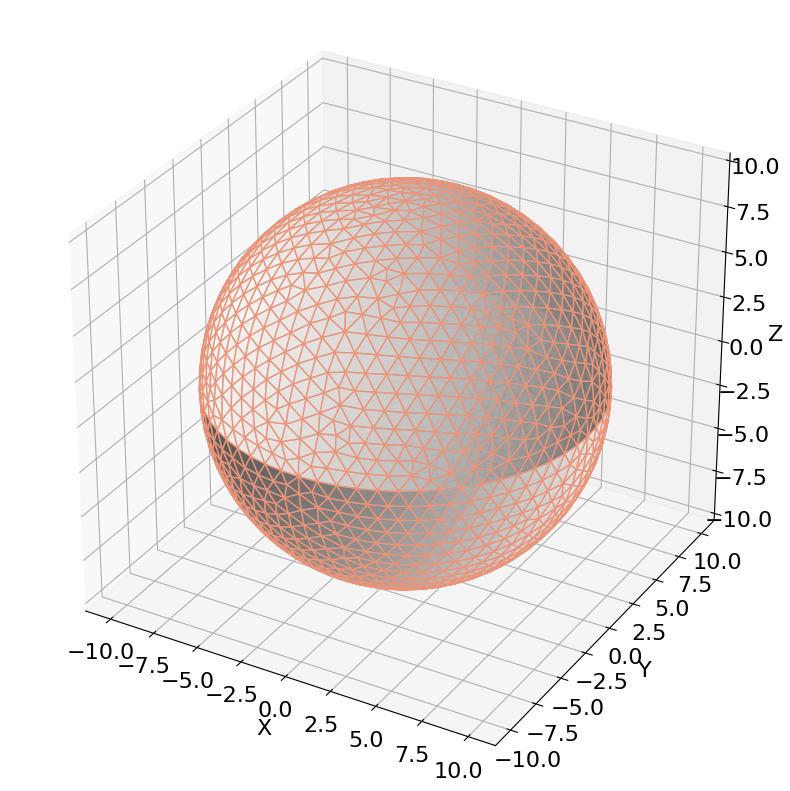

In [2]:
import meshio
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams.update({'font.size': 16}) 
# 读取.msh文件
mesh = meshio.read("sphere.msh")

# 获取点和三角形
points = mesh.points
triangles = mesh.cells_dict["triangle"]

# 使用matplotlib进行可视化
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

# 绘制三角形
ax.plot_trisurf(points[:, 0], points[:, 1], points[:, 2], triangles=triangles, color='#FFFFFF', edgecolor='#E9957A', alpha=0.9)

# 设置坐标轴的标签
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_aspect('equal')
# 显示图形
plt.show()

In [5]:
# import matplotlib.pyplot as plt
from firedrake import *
import matplotlib.pyplot as plt
import plotly.graph_objects as go
# 读取 "cylinder.msh" 文件
mesh = Mesh("cylinder.msh")
plt.rcParams.update({'font.size': 25}) 
V = FunctionSpace(mesh, "Lagrange", 2)

# 定义 u 和 v 的函数
u, v = TrialFunction(V), TestFunction(V)
phi, psi = TestFunction(V), TestFunction(V)

# GS 方程的参数
D_u, D_v, a, b = Constant(1/20), Constant(1), Constant(0.1), Constant(0.9)

# 初始条件
x, y= SpatialCoordinate(mesh)
#u0_expr = exp(-25*((x - 5)**2 + (y - 5)**2))
#v0_expr = 2*exp(-25*((x - 10)**2 + (y - 10)**2))
u0_expr = sin(x*x+y*y)
v0_expr = cos(x*x+y*y)
u0, v0 = interpolate(u0_expr, V), interpolate(v0_expr, V)

u, v = Function(V, name="U-Concentration"), Function(V, name="V-Concentration")
dt = 0.01
# GS 方程的弱形式
F_u = (u - u0)*phi*dx - dt*(-D_u*dot(grad(u), grad(phi))*dx + u*u*v*phi*dx - u*phi*dx +a*phi*dx)
F_v = (v - v0)*psi*dx - dt*(-D_v*dot(grad(v), grad(psi))*dx - u*u*v*psi*dx + b*psi*dx)

t_end = 5.0
num_steps = int(t_end / dt)
output_times = [0,t_end/5,2*t_end/5,3*t_end/5,4*t_end/5]


for step in range(num_steps):
    current_time = step * dt
    solve(F_u == 0, u)
    solve(F_v == 0, v)
    u0.assign(u)
    v0.assign(v)

    if current_time in output_times:
        u_values = u.dat.data_ro
        fig = go.Figure(data=[
            go.Mesh3d(
                x=points[:, 0],
                y=points[:, 1],
                z=points[:, 2],
                i=triangles[:, 0],
                j=triangles[:, 1],
                k=triangles[:, 2],
                intensity=u_values,  # 这里设置标量值以用于上色
                colorscale='Icefire'  # 选择一个色阶
            )
        ])
        fig.update_layout(scene_camera=dict(
            up=dict(x=0, y=0, z=1),
            center=dict(x=0, y=0, z=0),
            eye=dict(x=-1, y=1, z=1)
        ))
        fig.show()
        plt.show()


ConvergenceError: Nonlinear solve failed to converge after 0 nonlinear iterations.
Reason:
   DIVERGED_FNORM_NAN